In [1]:
from monte_carlo import monte_carlo
import numpy as np

def getenergy(count):
    density, temp = 0.1, 1.0
    step = count*1000
    sim = monte_carlo(maxstep=step, temp=temp, count=count, size=np.sqrt(count/density), mode='periodic',
                  dimension=2, rand=True, start_recording=step*0.6, recording_interval=50)
    elist = np.array(sim.get_energy_per_step())
    ae = np.average(elist)
    pe = np.sqrt(np.average(elist*elist) - ae**2)
    return ae, pe

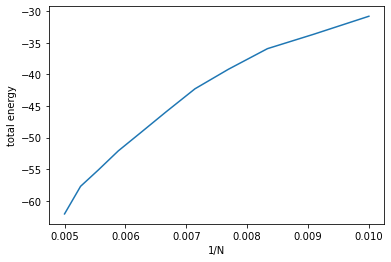

In [2]:
from matplotlib import pyplot as plt

Nlist = np.arange(100, 201, 10)
xlist = [1/i for i in Nlist] 
ylist = []
plist = []
for i in Nlist:
    ae, pe = getenergy(i)
    ylist.append(ae)
    plist.append(pe) 
# plt.yscale('log')
plt.xlabel('1/N')
plt.ylabel('total energy')
plt.plot(xlist, ylist)
plt.savefig("fig/sc_exp2_e.eps",format='eps')

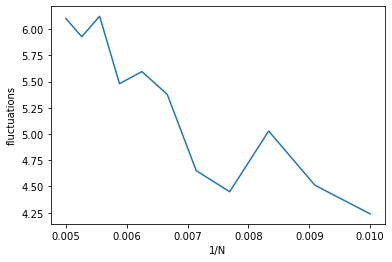

In [3]:
plt.plot(xlist, plist)
plt.xlabel('1/N')
plt.ylabel('fluctuations')
plt.savefig("fig/sc_exp2_p.eps",format='eps')

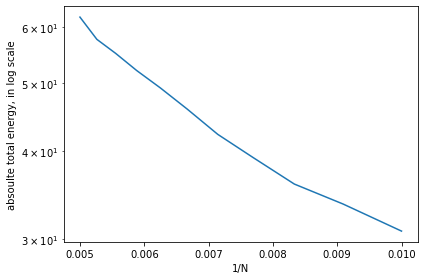

In [4]:
newlist = np.array(ylist)
newlist*=-1
plt.yscale('log')
plt.ylabel('absoulte total energy, in log scale')
plt.xlabel('1/N')
plt.plot(xlist, newlist)
plt.tight_layout()
plt.savefig("fig/sc_exp2_loge.eps",format='eps')

In [5]:
ylist

[-30.77555834338995,
 -33.63399148616336,
 -35.908753242475996,
 -39.169980774424914,
 -42.26417044045025,
 -45.92378400610906,
 -49.21706000345957,
 -52.10187988130799,
 -55.115088187270864,
 -57.71037126154101,
 -62.078372341991816]

In [6]:
plist

[4.238310539441237,
 4.512345042389744,
 5.0283580600715,
 4.449936341300379,
 4.650917507845609,
 5.378140638052913,
 5.595217447580532,
 5.479949519189961,
 6.1228883762015975,
 5.927788641713097,
 6.102235394424728]

In [8]:
np.array(plist)**2

array([17.96327623, 20.36125778, 25.28438478, 19.80193344, 21.63103366,
       28.92439672, 31.30645829, 30.02984673, 37.48976207, 35.13867818,
       37.23727681])